# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [143]:
data = pd.read_csv('data_encoded.csv')
data.head()

,sexo,posse_de_veiculo,posse_de_imovel,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,mau,...,tipo_residencia_Rented apartment,tipo_residencia_With parents,qt_pessoas_residencia_2.0,qt_pessoas_residencia_3.0,qt_pessoas_residencia_4.0,qt_pessoas_residencia_5.0,qt_pessoas_residencia_6.0,qt_pessoas_residencia_7.0,qt_pessoas_residencia_9.0,qt_pessoas_residencia_15.0
0,0,1,1,58.832877,3.106849,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,52.356164,8.358904,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,52.356164,8.358904,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,46.224658,2.106849,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,29.230137,3.021918,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [144]:
y =  data.mau

X = data.drop('mau', axis=1)

In [145]:
X_train, X_test, y_train, train = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [146]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

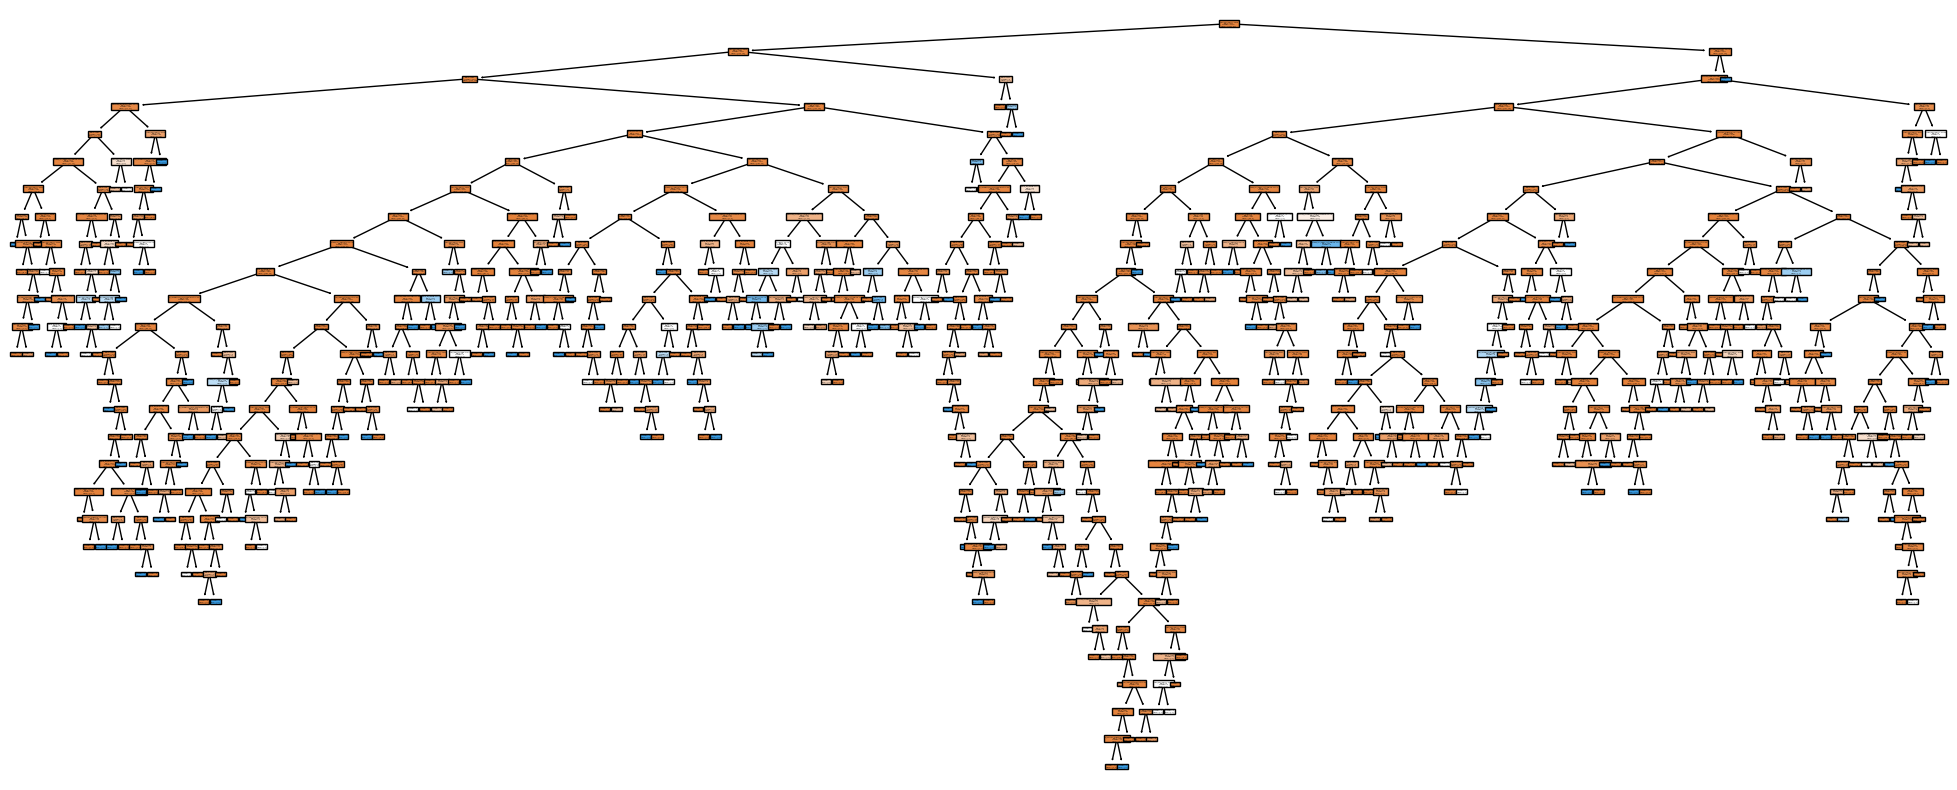

In [147]:
# Visualizando a árvore de decisão
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          feature_names=X.columns);

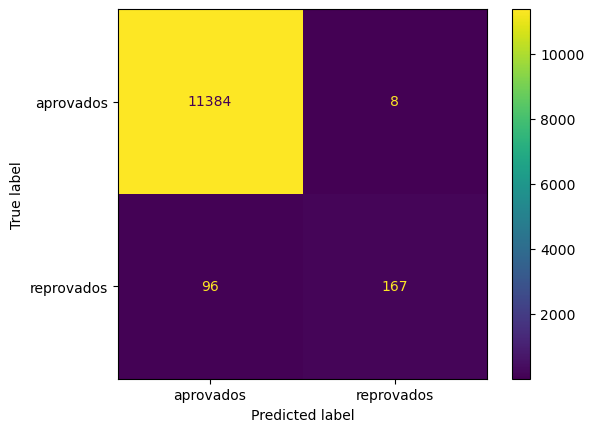

In [148]:
# Visualização da matriz de classificação (ou matriz de confusão) com os rótulos "aprovados" e "reprovados"
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
dist = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['aprovados', 'reprovados'])
dist.plot()

In [149]:
predict = clf.predict(X_train)

In [150]:
# Aqui a acurácia com a base de treinamento
accuracy_score(y_train, predict)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [151]:
clf_2 = DecisionTreeClassifier(random_state=100)
clf_2 = clf.fit(X_test,y_test)

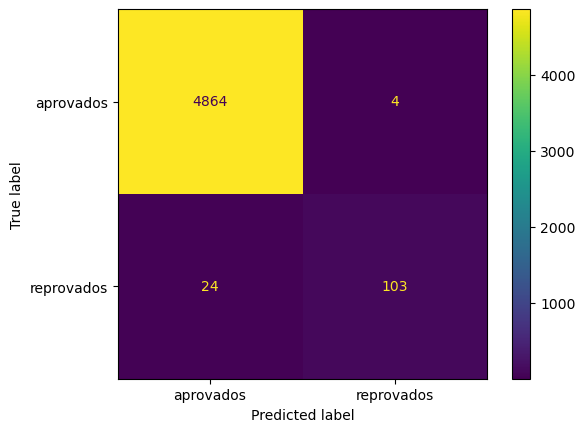

In [152]:
# Visualização da matriz de classificação (ou matriz de confusão) com os rótulos "aprovados" e "reprovados"
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
dist = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['aprovados', 'reprovados'])
dist.plot()

In [153]:
predict = clf_2.predict(X_test)

In [154]:
# Aqui a acurácia com a base de teste
accuracy_score(y_test, predict)

0.9943943943943944

In [155]:
clf_2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_2 = clf_2.fit(X_test,y_test)
predict = clf_2.predict(X_test)
accuracy_score(y_test, predict)

0.9767767767767768

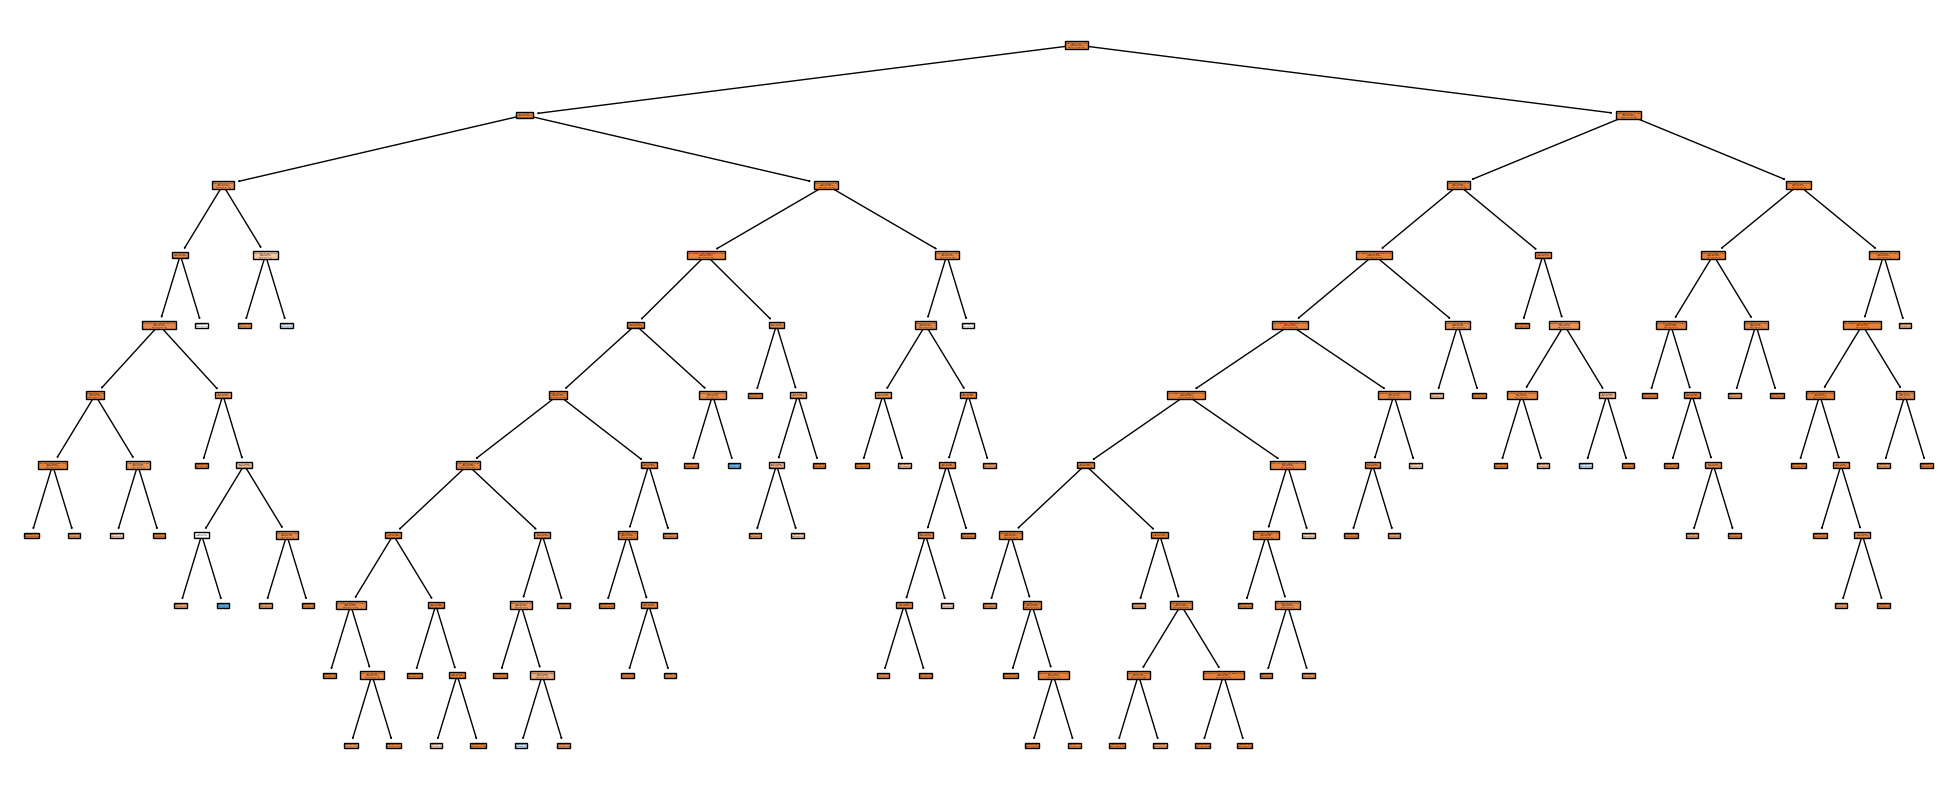

In [156]:
# Visualizando a árvore de decisão
plt.figure(figsize=(25, 10))
plot_tree(clf_2,
          filled=True,
          feature_names=X.columns);

In [157]:
clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [158]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

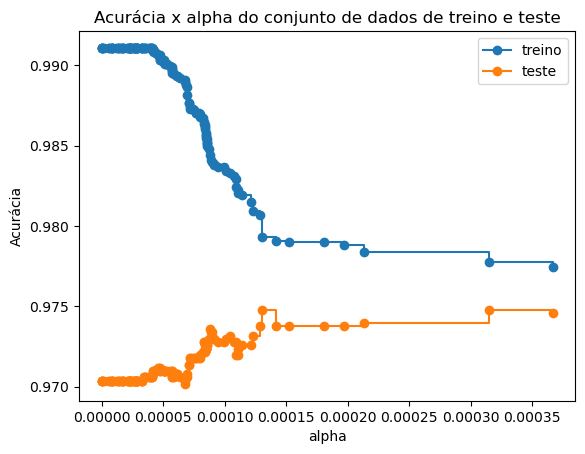

In [159]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [160]:
pd.DataFrame({'alpha': ccp_alphas.tolist(), 'score': test_scores})

,alpha,score
0,0.000000,0.970370
1,0.000000,0.970370
2,0.000000,0.970370
3,0.000000,0.970370
4,0.000002,0.970370
...,...,...
140,0.000181,0.973774
141,0.000197,0.973774
142,0.000213,0.973974
143,0.000315,0.974775


In [161]:
clf_podada = DecisionTreeClassifier(random_state=123, ccp_alpha=0.000315)

0.9747747747747748

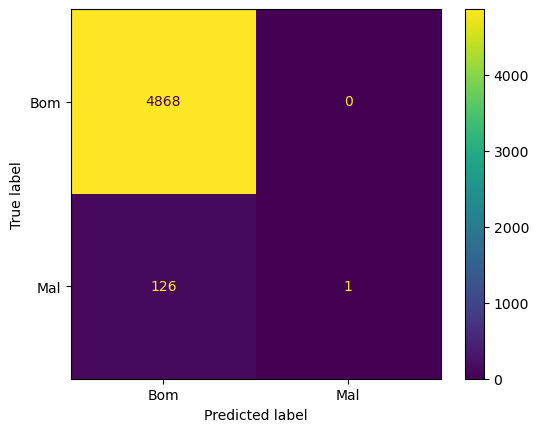

In [162]:
clf_podada.fit(X_train, y_train)
predict = clf_podada.predict(X_test)
y_pred = clf_podada.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bom', 'Mal'])
disp.plot()
accuracy_score(y_test, predict)

In [163]:
bons = accuracy_score(y_test, predict)
maus = 1 - bons
print('A proporção de maus pagadores é', maus)

A proporção de maus pagadores é 0.02522522522522519


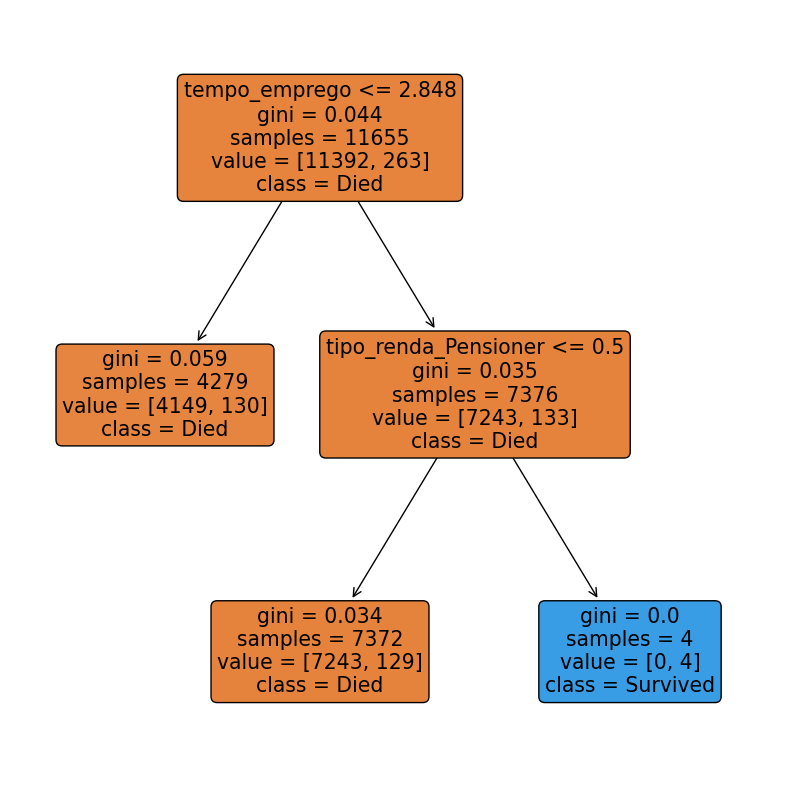

In [164]:
plt.figure(figsize=[10,10])
plot_tree(clf_podada,
         filled=True,
         rounded=True,
         class_names=['Died', 'Survived'],
         feature_names=X_train.columns);